## Human Activity Recognition: Prediction Model And analysis

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


* Lets start by importing necessary libraries for now

In [4]:
X_train = pd.read_csv(r'C:\Users\pc\OneDrive\Documents\GitHub\INONEST-SOFTWARE-PROJECTS\Human  Activity Recognition\X_train.txt', header=None, sep=r'\s+')
y_train = pd.read_csv(r'C:\Users\pc\OneDrive\Documents\GitHub\INONEST-SOFTWARE-PROJECTS\Human  Activity Recognition\y_train.txt', header=None, sep=r'\s+')

# Do the same for the test paths
X_test = pd.read_csv(r'C:\Users\pc\Downloads\human+activity+recognition+using+smartphones\UCI HAR Dataset\UCI HAR Dataset\test\X_test.txt', header=None, sep=r'\s+')
y_test = pd.read_csv(r'C:\Users\pc\Downloads\human+activity+recognition+using+smartphones\UCI HAR Dataset\UCI HAR Dataset\test\y_test.txt', header=None, sep=r'\s+')

# Your other commands
print("X_train info:")
X_train.info()

print("\ny_train info:")
y_train.info()

print("\nX_test info:")
X_test.info()

print("\ny_test info:")
y_test.info()

X_train info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, 0 to 560
dtypes: float64(561)
memory usage: 31.5 MB

y_train info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       7352 non-null   int64
dtypes: int64(1)
memory usage: 57.6 KB

X_test info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 561 entries, 0 to 560
dtypes: float64(561)
memory usage: 12.6 MB

y_test info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       2947 non-null   int64
dtypes: int64(1)
memory usage: 23.2 KB


* The X_train data has 7352 rows and 561 columns, meaning 7352 subjects and 561 features and 1 label colum
* the y_test data has 2940 rows and 561 colums , our goal here is to clean up the data and build a model that has a high accuracy of prediction of future data

--- Activity Distribution in Training Data ---
   activity_id  count       activity_name
0            6   1407              LAYING
1            5   1374            STANDING
2            4   1286             SITTING
3            1   1226             WALKING
4            2   1073    WALKING_UPSTAIRS
5            3    986  WALKING_DOWNSTAIRS

Saved plot to 'activity_distribution.png'


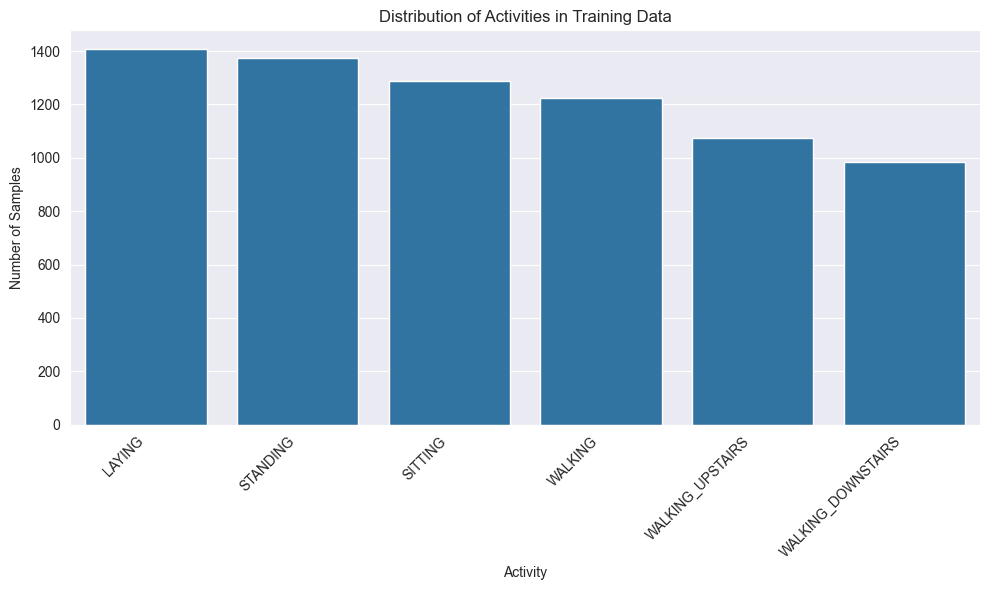

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

labels_path = r'C:\Users\pc\Downloads\human+activity+recognition+using+smartphones\UCI HAR Dataset\UCI HAR Dataset\activity_labels.txt'


try:
    activity_labels = pd.read_csv(labels_path, header=None, sep=r'\s+', names=['activity_id', 'activity_name'])
except FileNotFoundError:
    print(f"Error: Could not find activity_labels.txt at: {labels_path}")
    print("Please find the correct path to 'activity_labels.txt' and update the 'labels_path' variable.")
    # Stop here if the file isn't found
    raise
# Let's give its single column a proper name.
y_train.columns = ['activity_id']

# --- 3. Get Activity Counts ---
activity_counts = y_train['activity_id'].value_counts()

# --- 4. Merge Counts with Labels ---
# Match the activity_id (1, 2, 3...) with the activity_name ('WALKING', 'SITTING'...)
merged_counts = pd.merge(activity_counts, activity_labels, on='activity_id')
merged_counts = merged_counts.sort_values('count', ascending=False)

print("--- Activity Distribution in Training Data ---")
print(merged_counts)


# --- 5. Plot the Distribution ---
plt.figure(figsize=(10, 6))
sns.barplot(data=merged_counts, x='activity_name', y='count')
plt.title('Distribution of Activities in Training Data')
plt.xlabel('Activity')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.savefig('activity_distribution.png')
print("\nSaved plot to 'activity_distribution.png'")

# Show the plot in your notebook
plt.show()

In [6]:
missing_values_count=X_train.isnull().sum().sum()
print(f'Total number of mising values in X_train: {missing_values_count}')

Total number of mising values in X_train: 0


* We checked for any missing data and we found none, so next, we will implement a model, for this project, I am first if trying RandomForestClassifier.

In [7]:
rf=RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train.values.ravel())
y_pred=rf.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(f'The accuracy of our model is: {accuracy*100:.2f}%')

The accuracy of our model is: 92.57%


* Our model got an accuracy of 92.57, now lets do some hyperparameter
* Tuning

In [8]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV
param_grid= {'n_estimators':[100,150],'max_depth':[10,20,None],}
rf_model_base = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_model_base,
                           param_grid=param_grid,
                           cv=3,          # 3-fold cross-validation
                           n_jobs=-1,     # Use all CPU cores
                           verbose=2)
grid_search.fit(X_train,y_train.values.ravel())
print(f'Best paramaters found: {grid_search.best_params_}')
best_model=grid_search.best_estimator_
y_pred_best= best_model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred_best)
print(f'accuracy : {accuracy*100:.2f}')

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best paramaters found: {'max_depth': 10, 'n_estimators': 150}
accuracy : 92.30


In [9]:
rfe = RFECV(estimator=best_model,
            step=10,
            cv=3,
            scoring='accuracy',
            n_jobs=-1,
            verbose=1)
rfe.fit(X_train, y_train.values.ravel())
# keeping only the best features.
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

print(f"Original data shape: {X_train.shape}")
print(f"New reduced data shape: {X_train_rfe.shape}")

# --- 5. Train and Test the FINAL Model ---
# Now we train our best model ONE LAST TIME,
# but only on the reduced feature set.
print("\nTraining final model on selected features...")
final_model = best_model

final_model.fit(X_train_rfe, y_train.values.ravel())

# Test on the reduced test set
y_pred_rfe = final_model.predict(X_test_rfe)
accuracy_rfe = accuracy_score(y_test, y_pred_rfe)

print(f"\n--- Final Model Accuracy (Reduced Features): {accuracy_rfe * 100:.2f}% ---")

Original data shape: (7352, 561)
New reduced data shape: (7352, 561)

Training final model on selected features...

--- Final Model Accuracy (Reduced Features): 92.30% ---
